In [40]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sn
import sklearn.preprocessing as StandardScaler


In [41]:
# load dataset 
from sklearn.datasets import load_iris

In [42]:
iris = load_iris()

In [43]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [44]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [45]:
data = pd.DataFrame(iris.data)
data["class"] = iris.target
data.head()

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   class   150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [47]:
data.describe()

,0,1,2,3,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [48]:
# features 
x = data.iloc[:,:4]
x

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
y = data.iloc[:,4]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

In [50]:
x.shape, y.shape

((150, 4), (150,))

## PCA implementation 

In [53]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA()
X = pca.fit_transform(x)
X

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

In [56]:
pca.get_covariance()

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [58]:
explained_variance = pca.explained_variance_ratio_
explained_variance, pca.components_

(array([0.92461872, 0.05306648, 0.01710261, 0.00521218]),
 array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
        [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
        [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]]))

## Visualization 

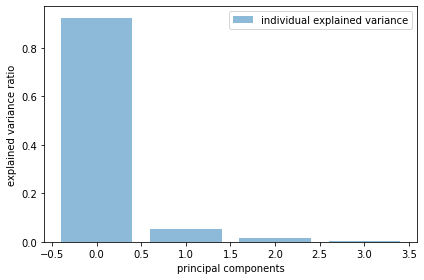

In [65]:
plt.figure(figsize = (6,4))
plt.bar(range(4),explained_variance , alpha = 0.5 , align ="center",
       label = "individual explained variance")
plt.ylabel("explained variance ratio")
plt.xlabel("principal components")
plt.legend(loc = "best")
plt.tight_layout()

In [66]:
# From the visualizations you get the intuitions that there are mainly only 3 components with significant variance,
# hence we select the number of principal components as 3.

In [69]:
pca = PCA(n_components=3)
X = pca.fit_transform(x)


# Train Test Split

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

# Model Training

In [71]:
# KNN model 

In [74]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Predictions

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [77]:
cm = confusion_matrix(y_test, y_pred)  #confusion matrix
print(cm)
print(accuracy_score(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
0.9777777777777777


In [ ]:
# The confusion matrix will show you the count of false positives,
# false negatives, true positives, and true negatives.

# The accuracy score will give you how much our model has been effective
# in giving predictions for new data. 97% is a very good score, and hence we can say that ours is a good model.